In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
from wordcloud import WordCloud


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Load Facebook data
df = pd.read_csv("facebook.csv")

In [ ]:
df.head()

,username,location,followers,following,likes,comments,created_at,post_text
0,johnsonjoshua,Heatherfort,1924,2055,507,423,959130481,build quite morning including that character y...
1,donaldgarcia,North Derek,509,3942,987,232,24471919,wear throughout series most adult above safe d...
2,garzaanthony,South Geraldmouth,4606,646,37,204,569539380,side perhaps order answer blue structure answe...
3,robinsonwilliam,Port Evelynmouth,4112,3780,129,212,450293572,story win group important civil nature travel ...
4,hoffmanjennifer,Jennaside,3757,3445,514,373,535884921,box hundred lead structure ready long instead ...


In [ ]:
df.tail()

,username,location,followers,following,likes,comments,created_at,post_text
495,alyssasanders,East Carriebury,3780,2656,462,210,1332845823,energy defense anything road bank sell success...
496,john10,South Donaldland,3362,3924,909,186,152934631,guy send into front already relationship know ...
497,victorhughes,West Toni,2514,3173,233,346,1014084043,point summer such PM number catch brother lay ...
498,greenjorge,Lake Nicole,500,3212,423,368,417779639,industry follow third daughter sound less lead...
499,nlewis,Port Jennamouth,857,1296,347,121,1074766980,grow not without last yes out as future Mrs co...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    500 non-null    object
 1   location    500 non-null    object
 2   followers   500 non-null    int64 
 3   following   500 non-null    int64 
 4   likes       500 non-null    int64 
 5   comments    500 non-null    int64 
 6   created_at  500 non-null    int64 
 7   post_text   500 non-null    object
dtypes: int64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.isnull().sum()

,0
username,0
location,0
followers,0
following,0
likes,0
comments,0
created_at,0
post_text,0


In [ ]:
# Preprocessing
df['post_text'] = df['post_text'].str.replace('[^\w\s]', '', regex=True)
df['post_text'] = df['post_text'].str.lower()

df['location'] = df['location'].fillna('Unknown')
df['username'] = df['username'].fillna('NoUsername')
df['followers'] = df['followers'].fillna(df['followers'].mean())
df['following'] = df['following'].fillna(df['following'].mean())
df['post_text'] = df['post_text'].astype(str)

print(df.isnull().sum())

username      0
location      0
followers     0
following     0
likes         0
comments      0
created_at    0
post_text     0
dtype: int64


In [ ]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['post_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment'] = pd.cut(df['sentiment_score'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

In [ ]:
# Convert timestamp to date
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df['date'] = df['created_at'].dt.date

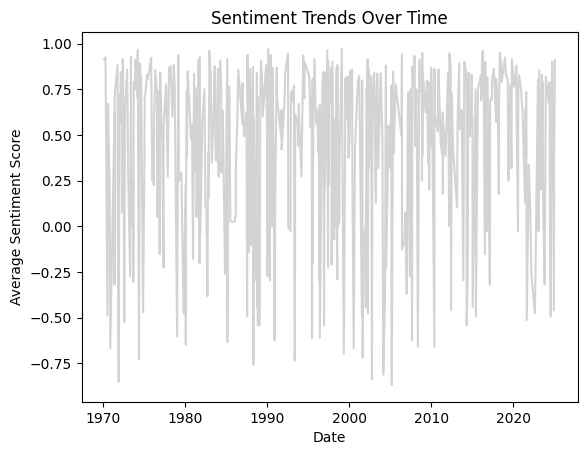

In [ ]:
# Sentiment Trends
df.groupby('date')['sentiment_score'].mean().plot(color='lightgrey')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

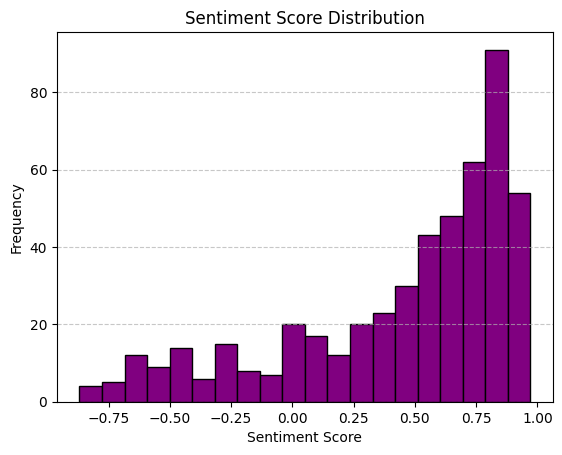

In [ ]:
# Sentiment Score Distribution
plt.hist(df['sentiment_score'], bins=20, color='purple', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-63-347539be72e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='sentiment_score', data=df, palette='coolwarm')


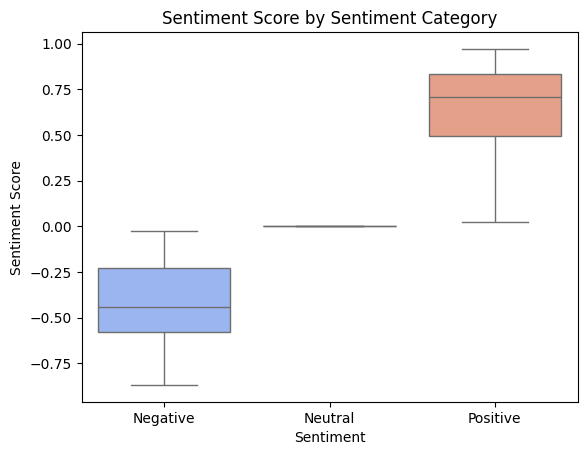

In [ ]:
# Sentiment Score Boxplot
sns.boxplot(x='sentiment', y='sentiment_score', data=df, palette='coolwarm')
plt.title('Sentiment Score by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()

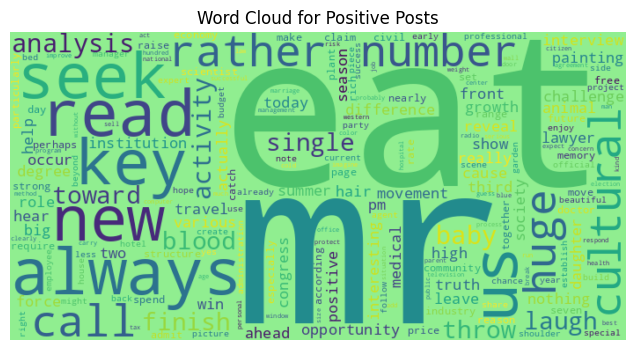

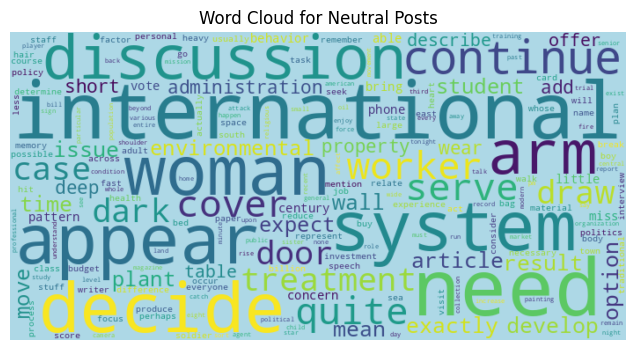

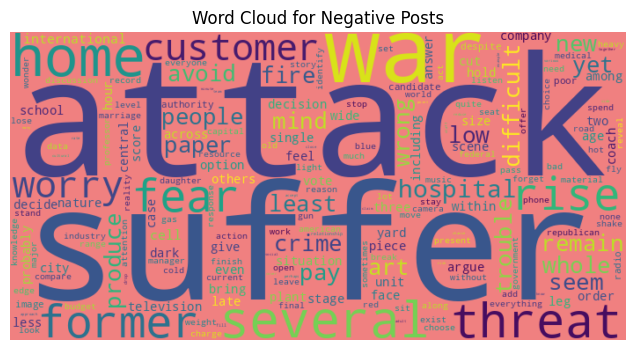

In [ ]:
# Word Clouds
for sentiment, color in zip(['Positive', 'Neutral', 'Negative'], ['lightgreen', 'lightblue', 'lightcoral']):
    text = ' '.join(df[df['sentiment'] == sentiment]['post_text'])
    wordcloud = WordCloud(width=700, height=350, background_color=color).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Posts')
    plt.axis('off')
    plt.show()

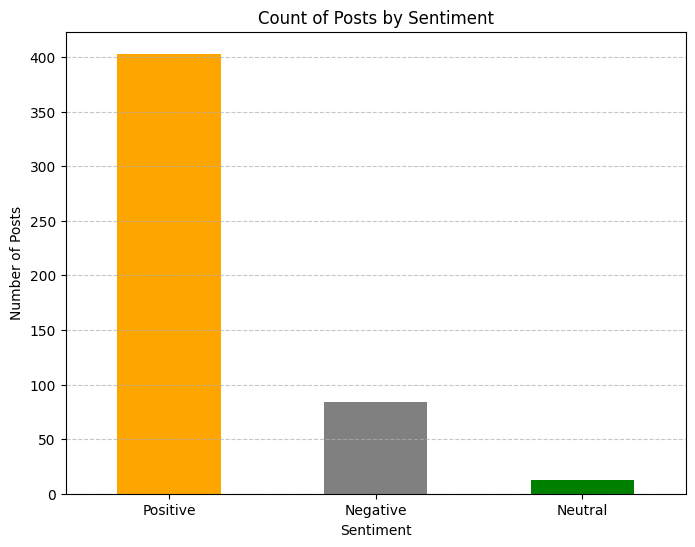

In [ ]:
# Bar Chart for Sentiment Counts
df['sentiment'].value_counts().plot(kind='bar', color=['orange', 'gray', 'green'], figsize=(8, 6))
plt.title('Count of Posts by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-66-be6d6ff5b180>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='likes', data=df, palette='pastel')


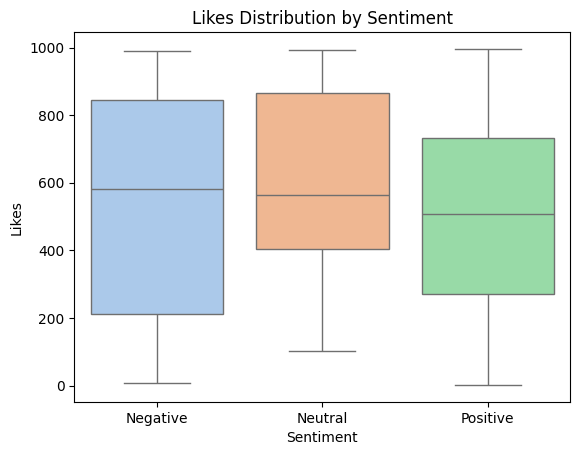

In [ ]:
# Likes Distribution by Sentiment
sns.boxplot(x='sentiment', y='likes', data=df, palette='pastel')
plt.title('Likes Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.show()

<ipython-input-67-03c6c0a6f751>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='comments', data=df, palette='dark')


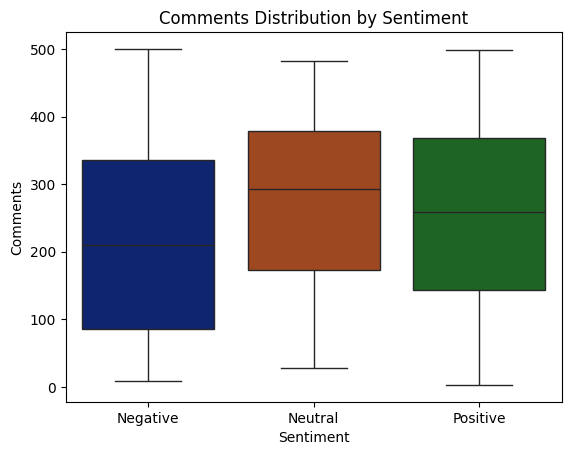

In [ ]:
# Comments Distribution by Sentiment
sns.boxplot(x='sentiment', y='comments', data=df, palette='dark')
plt.title('Comments Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comments')
plt.show()

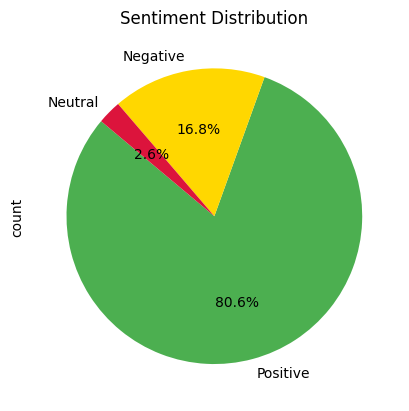

In [ ]:
# Sentiment Distribution (Pie Chart)
df['sentiment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#FFD700', '#DC143C']  # Green, Gold, Crimson
)
plt.title('Sentiment Distribution')
plt.show()

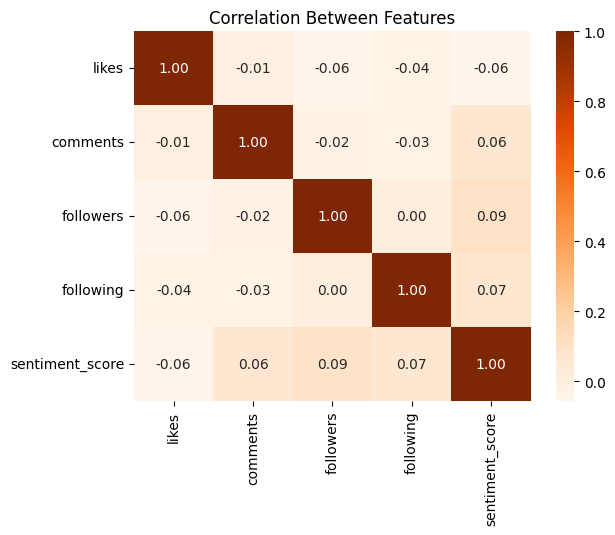

In [ ]:
# Correlation Heatmap
numerical_cols = ['likes', 'comments', 'followers', 'following', 'sentiment_score']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")  # Shades of Orange
plt.title('Correlation Between Features')
plt.show()